Results from Level IW algorithm (for boxplot and accuracy timelime).
Two Classes Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static lp as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  0.4561852839506173
Average MCC:  0.0979763219906
Average macro-F1: 0.3916907428783372
Average Accuracy:  53.7235
Standard Deviation:  9.29653423325
Variance:  86.42554875


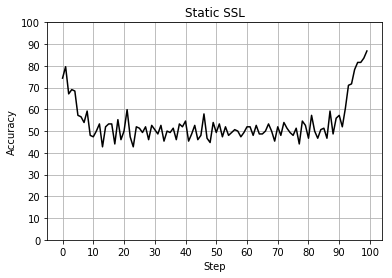

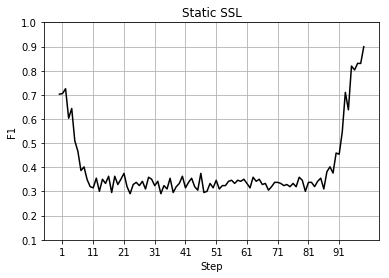




METHOD: Sliding lp as classifier
Execution time:  0.3329967407407408
Average MCC:  0.0278631211869
Average macro-F1: 0.35018041194697874
Average Accuracy:  51.2035
Standard Deviation:  6.38475533987
Variance:  40.76510075


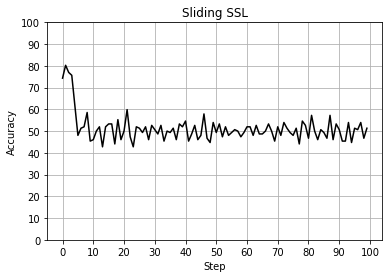

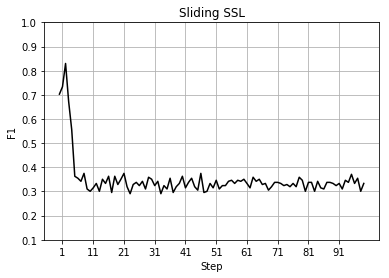




METHOD: Incremental lp as classifier
Execution time:  4.586448592592593
Average MCC:  0.0927250730632
Average macro-F1: 0.3890158091163557
Average Accuracy:  53.6444
Standard Deviation:  9.11359208216
Variance:  83.05756064


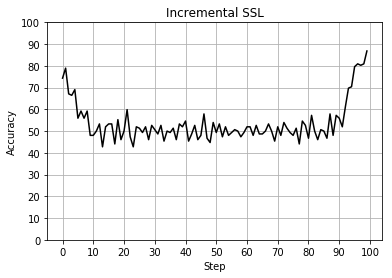

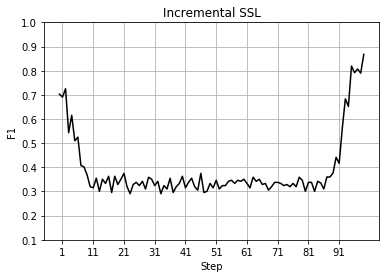




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.5447620740740735
Average MCC:  0.688737154072
Average macro-F1: 0.8244983364737021
Average Accuracy:  82.7697
Standard Deviation:  6.90001586303
Variance:  47.61021891


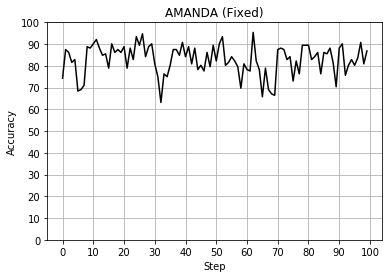

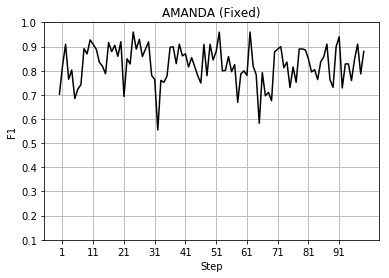




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  4.619430716049384
Average MCC:  -0.0323757058283
Average macro-F1: 0.34903448003904347
Average Accuracy:  48.8819
Standard Deviation:  10.0586823884
Variance:  101.17709139


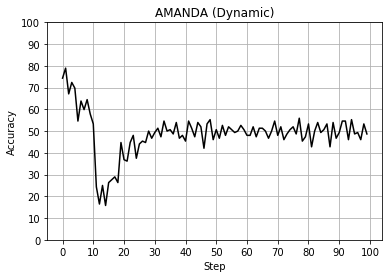

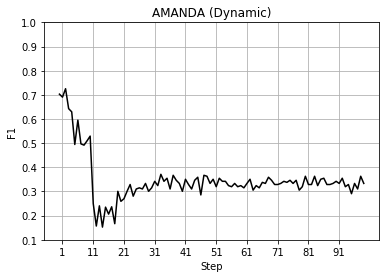




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
gmmWithBIC: Error to choose the best GMM model


AttributeError: 'NoneType' object has no attribute 'precisions_'

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_labelpropagation
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load2CHT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_labelpropagation, 3, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 3, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 3, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 3, 0.9, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 3, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 3)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '2CHT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()